## Регрессионная нейронная сеть

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Импортируем наш датасет

In [2]:
import pickle
input = open('data_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

y_train = np.asarray(y_train).reshape(-1,1)
y_test = np.asarray(y_test).reshape(-1,1)

Проводим шкалирование.

In [3]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(y_train)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

!pip install tensorflow

!pip install keras

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Прописываем структуру нашей сети (стоит отметить, что структура, которая описана ниже была получена экспериментальным путём). Добавляем исходный слой. На входе 8 нейронов.У нас нейронная сеть с расширением. Выбранная функция-тангенс, так как нам подходит диапазон ёё изменения.Добавляем 2 слой.И добавляем последний слой.

In [5]:
rnn = Sequential()

rnn.add(Dense(10, activation = 'tanh', input_dim = 8))

rnn.add(Dense(6, activation = 'tanh'))

rnn.add(Dense(1, activation = 'linear'))

rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

Проводим обучение. Отмечу, что я выбрала именно такой размер партии, так как при нём наилучшие показатели ошибок.

In [6]:
his=rnn.fit(X_train, y_train, batch_size = 12, validation_data=(X_test, y_test),epochs = 100)

Epoch 1/100
91/91 [==============================] - 1s 2ms/step - loss: 1.4572 - accuracy: 0.0000e+00 - val_loss: 0.9315 - val_accuracy: 0.0000e+00
Epoch 2/100
91/91 [==============================] - 0s 1ms/step - loss: 0.9043 - accuracy: 0.0000e+00 - val_loss: 0.8073 - val_accuracy: 0.0000e+00
Epoch 3/100
91/91 [==============================] - 0s 1ms/step - loss: 0.7698 - accuracy: 0.0000e+00 - val_loss: 0.7948 - val_accuracy: 0.0000e+00
Epoch 4/100
91/91 [==============================] - 0s 2ms/step - loss: 0.7185 - accuracy: 0.0000e+00 - val_loss: 0.7833 - val_accuracy: 0.0000e+00
Epoch 5/100
91/91 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.0000e+00 - val_loss: 0.7883 - val_accuracy: 0.0000e+00
Epoch 6/100
91/91 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.0000e+00 - val_loss: 0.7999 - val_accuracy: 0.0000e+00
Epoch 7/100
91/91 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.0000e+00 - v

91/91 [==============================] - 0s 2ms/step - loss: 0.5796 - accuracy: 0.0000e+00 - val_loss: 0.7767 - val_accuracy: 0.0000e+00
Epoch 56/100
91/91 [==============================] - 0s 3ms/step - loss: 0.5792 - accuracy: 0.0000e+00 - val_loss: 0.7502 - val_accuracy: 0.0000e+00
Epoch 57/100
91/91 [==============================] - 0s 1ms/step - loss: 0.5785 - accuracy: 0.0000e+00 - val_loss: 0.7704 - val_accuracy: 0.0000e+00
Epoch 58/100
91/91 [==============================] - 0s 1ms/step - loss: 0.5787 - accuracy: 0.0000e+00 - val_loss: 0.7576 - val_accuracy: 0.0000e+00
Epoch 59/100
91/91 [==============================] - 0s 801us/step - loss: 0.5763 - accuracy: 0.0000e+00 - val_loss: 0.7585 - val_accuracy: 0.0000e+00
Epoch 60/100
91/91 [==============================] - 0s 797us/step - loss: 0.5730 - accuracy: 0.0000e+00 - val_loss: 0.7593 - val_accuracy: 0.0000e+00
Epoch 61/100
91/91 [==============================] - 0s 2ms/step - loss: 0.5710 - accuracy: 0.0000e+00 - val

In [7]:
y_pred = rnn.predict(X_test)

Посмотрим на графики ошибок обучения и тестирования. Видим, что модель начинает переобучаться после 5 эпох, поэтому построим ещё одну сеть rnn1.

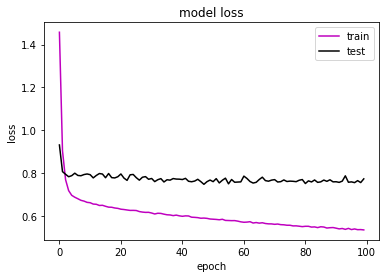

In [8]:
plt.figure()
plt.plot(his.history['loss'],'m')
plt.plot(his.history['val_loss'],'k')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [9]:
rnn1 = Sequential()

rnn1.add(Dense(10, activation = 'tanh', input_dim = 8))

rnn1.add(Dense(6, activation = 'tanh'))

rnn1.add(Dense(1, activation = 'linear'))

rnn1.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [10]:
his1=rnn1.fit(X_train, y_train, batch_size = 12, validation_data=(X_test, y_test),epochs = 5)

Epoch 1/5
91/91 [==============================] - 0s 2ms/step - loss: 1.2435 - accuracy: 0.0000e+00 - val_loss: 0.9896 - val_accuracy: 0.0000e+00
Epoch 2/5
91/91 [==============================] - 0s 1ms/step - loss: 0.8580 - accuracy: 0.0000e+00 - val_loss: 0.8581 - val_accuracy: 0.0000e+00
Epoch 3/5
91/91 [==============================] - 0s 1ms/step - loss: 0.7666 - accuracy: 0.0000e+00 - val_loss: 0.8211 - val_accuracy: 0.0000e+00
Epoch 4/5
91/91 [==============================] - 0s 2ms/step - loss: 0.7323 - accuracy: 0.0000e+00 - val_loss: 0.8217 - val_accuracy: 0.0000e+00
Epoch 5/5
91/91 [==============================] - 0s 4ms/step - loss: 0.7181 - accuracy: 0.0000e+00 - val_loss: 0.8074 - val_accuracy: 0.0000e+00


In [11]:
y_pred1 = rnn1.predict(X_test)

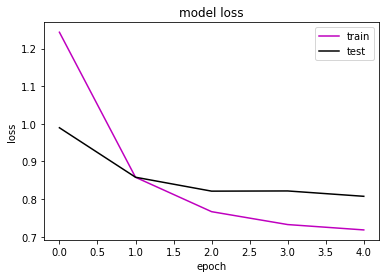

In [12]:
plt.figure()
plt.plot(his1.history['loss'],'m')
plt.plot(his1.history['val_loss'],'k')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Обратно шкалируем данные.

In [13]:
y_hat = sc_y.inverse_transform(y_pred)
y_hat1 = sc_y.inverse_transform(y_pred1)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

Находим среднеквадратические ошибки для двух моделей. Сеть немного переобучена, но во втором случае разрыв между ошибками гораздо меньше.

In [14]:
from sklearn.metrics import mean_squared_error
mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(rnn.predict(X_train)), squared=False).round(3), mean_squared_error(y_test, y_hat, squared=False).round(3)

(11.78, 14.209)

In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(rnn1.predict(X_train)), squared=False).round(3), mean_squared_error(y_test, y_hat1, squared=False).round(3)

(13.559, 14.519)

Визуализация результатов второй модели.

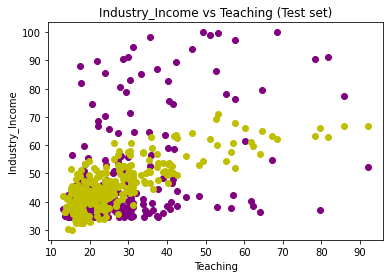

In [16]:
plt.scatter(X_test[:,5], y_test, color = 'purple')
plt.plot(X_test[:,5], y_hat1, 'yo')
plt.title('Industry_Income vs Teaching (Test set)')
plt.xlabel('Teaching')
plt.ylabel('Industry_Income')
plt.show()

### Вывод: построив все модели и сравнив результаты, я смело могу сказать, что пока наиболее оптимальным методом является Catboost, так как именно там мы имеем самые низкие среднеквадратические ошибки (11.34 и 13.18) и модель наименее переобучена. Также там имеем самое высокое значение коэффициента детерминации 0.51, то есть модель Catboost "объясняет" наши данные на 51%, что гораздо превышает показатели остальных вариантов моделей ( в среднем на 20%). Вспомним нашу задачу исследования и сделаем вывод, что на доход университета самое большое влияние оказывает ВВП на душу населения (то есть чем выше уровень экономического развития страны, тем выше доход в сфере образования), немного менее значимое влияние имеет уровень преподавания (хотим хороший доход-нанимаем хороших сотрудников). Неожиданным фактом стало сильное влияние на Industry_Income процента женщин. На первый взгляд казалось, что это вовсе не будет влиять на доход.Наверное, я поднимаю щекотливую и спорную тему, но видим, что наше исследование показывает, чем меньше женщин, тем выше доход.